Generate 10 Random AAK Waveforms 

In [1]:
import sys
import os

import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [ ]:
# Constants
YRSID_SI = 31558149.763545603 
SEC_TO_SOLAR_M = 4.925491025873693e-06 
MPC_TO_SOLAR_M = 2.089682521268661e+19
GPC_TO_SOLAR_M = 2.089682521268661e+22
M_TO_SOLAR_M = 1476.6250615036158
MPC_TO_M = 3.0856775814913674e+22
GPC_TO_M = 3.0856775814913674e+25

In [3]:
from few.trajectory.inspiral import EMRIInspiral
from few.amplitude.romannet import RomanAmplitude
from few.amplitude.interp2dcubicspline import Interp2DAmplitude
from few.waveform import FastSchwarzschildEccentricFlux, SlowSchwarzschildEccentricFlux, GenerateEMRIWaveform
from few.utils.utility import (get_overlap, 
                               get_mismatch, 
                               get_fundamental_frequencies, 
                               get_separatrix, 
                               get_mu_at_t, 
                               get_p_at_t, 
                               get_kerr_geo_constants_of_motion,
                               xI_to_Y,
                               Y_to_xI)

from few.utils.ylm import GetYlms
from few.utils.modeselector import ModeSelector
from few.summation.interpolatedmodesum import CubicSplineInterpolant
from few.waveform import SchwarzschildEccentricWaveformBase
from few.summation.interpolatedmodesum import InterpolatedModeSum
from few.summation.directmodesum import DirectModeSum
from few.utils.constants import *
from few.summation.aakwave import AAKSummation
from few.waveform import Pn5AAKWaveform, AAKWaveformBase

In [7]:
mu = np.random.uniform(low=10, high=30, size=None)
M = np.random.uniform(low=1e5, high=1e7, size=None)

a = np.random.uniform(low=0.2, high=0.998, size=None)
p0 = np.random.uniform(low=5, high=25, size=None)
e0 = np.random.uniform(low=0.0001, high=0.5, size=None)

iota0 = np.random.uniform(low=0, high=180, size=None)
Y0 = np.cos(iota0)

dist = np.random.uniform(low=1.0, high=3.0, size=None)

qS = np.random.uniform(low=0.2, high=0.4, size=None)
phiS = np.random.uniform(low=0.2, high=0.4, size=None)

qK = np.random.uniform(low=0.7, high=0.9, size=None)
phiK = np.random.uniform(low=0.1, high=0.3, size=None)

phi_phi0 = np.random.uniform(low=0, high=180, size=None)
phi_theta0 = np.random.uniform(low=0, high=180, size=None)
phi_r0 = np.random.uniform(low=0, high=180, size=None)

dt = 15.0 # timestep in seconds
T = 1.0 # Total time to run in years
mich = False

In [8]:
use_gpu = False

# keyword arguments for inspiral generator (RunKerrGenericPn5Inspiral)
inspiral_kwargs = {
    "DENSE_STEPPING": 0,  # we want a sparsely sampled trajectory
    "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
}

# keyword arguments for summation generator (AAKSummation)
sum_kwargs = {
    "use_gpu": use_gpu,  # GPU is availabel for this type of summation
    "pad_output": False,
}

wave_generator = Pn5AAKWaveform(inspiral_kwargs=inspiral_kwargs, sum_kwargs=sum_kwargs, use_gpu=False)


waveform = wave_generator(M, mu, a, p0, e0, Y0, dist, qS, phiS, qK, phiK, 
                          Phi_phi0=phi_phi0, Phi_theta0=phi_theta0, Phi_r0=phi_r0, mich=mich, dt=dt, T=T)

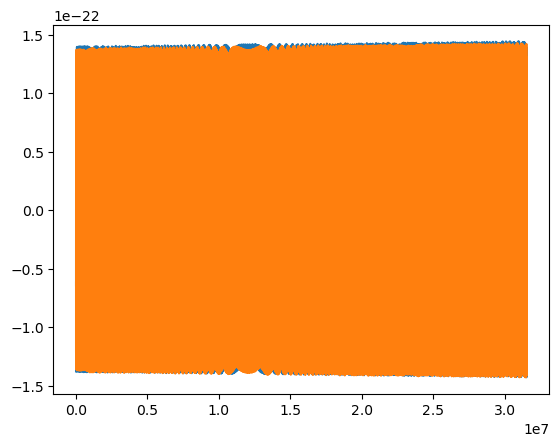

In [6]:
t = np.arange(len(waveform)) * dt
plt.plot(t, waveform.real)
plt.plot(t, waveform.imag)

Create a loop that can create and store randomly generated AAK WFs

In [ ]:
it = 1

for i in range(it):
        random_seed = np.random.randint(0, 1000)
        M = np.random.uniform(low=1e5, high=1e7, size=None)
        mu = np.random.uniform(low=10, high=30, size=None)
        a = np.random.uniform(low=0.1, high=0.998, size=None)
        p0 = np.random.uniform(low=5, high=25, size=None)
        e0 = np.random.uniform(low=0.0001, high=0.5, size=None)
        iota0 = np.random.uniform(low=0, high=180, size=None)
        Y0 = np.cos(iota0)
        qS = np.random.uniform(low=0.2, high=0.4, size=None)
        PhiS = np.random.uniform(low=0.2, high=0.4, size=None)
        qk = np.random.uniform(low=0.7, high=0.9, size=None)
        PhiK = np.random.uniform(low=0.1, high=0.3, size=None)
        Phi_phi0 = np.random.uniform(low=0, high=180, size=None)
        Phi_theta0 = np.random.uniform(low=0, high=180, size=None)
        Phi_r0 = np.random.uniform(low=0, high=180, size=None)
        dist = np.random.uniform(low=2, high=5, size=None) 
        dt = 15.0 
        T = 1.0 
        mich = False

        try: 
                waveform = wave_generator(M, mu, a, p0, e0, Y0, dist, qS, phiS, qK, phiK, 
                Phi_phi0=Phi_phi0, Phi_theta0=Phi_theta0, Phi_r0=Phi_r0, mich=mich, dt=dt, T=T)
                param_array = np.array([random_seed, M, mu, a, p0, e0, Y0, dist, qS, PhiS, qK, PhiK, Phi_phi0, Phi_theta0, Phi_r0, dt, T])
        except ValueError:
                continue
        
        time_values = [dt * t for t in range(len(waveform))]

        with open(f'Stochastic_AAKwaveform_params{i}.txt', 'w') as file:
                for line in param_array:
                        file.write(f"{line}\n") 

        with open(f'Stochastic_AAKwaveform{i}.txt', 'w') as file:        
                for t, w in zip(time_values, waveform):
                        file.write(f"{t}, {w.real}, {w.imag}\n")